<a href="https://github.com/conorosully/medium-articles/blob/master/src/interpretable%20ml/PDPs%20and%20ICE%20Plots/PDP_ICE.ipynb">Source</a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import accuracy_score, confusion_matrix

import xgboost as xgb

In [5]:
dataset = pd.read_csv("PDP_ICE.csv", sep="\t")

y = dataset['price']
X = dataset.drop('price', axis=1)

print(dataset.shape)
dataset.head()

(1000, 6)


,owner_age,car_age,km_driven,repairs,car_type,price
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053


In [6]:
model = RandomForestRegressor(max_depth=4, n_estimators=100, random_state=0)
model.fit(X, y)

preds = model.predict(X)

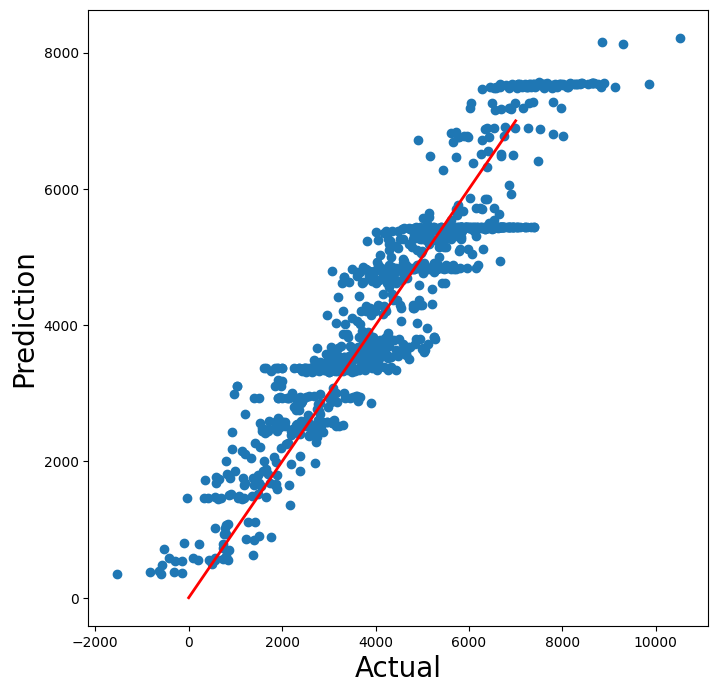

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(y, preds)
plt.plot([0, 7_000], [0, 7_000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Prediction', size=20)
plt.xlabel('Actual', size=20)

plt.show()

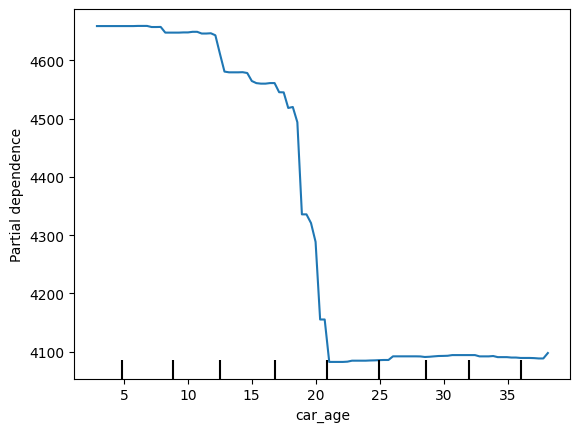

In [9]:
features = ['car_age']
PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()

### ICE Plot

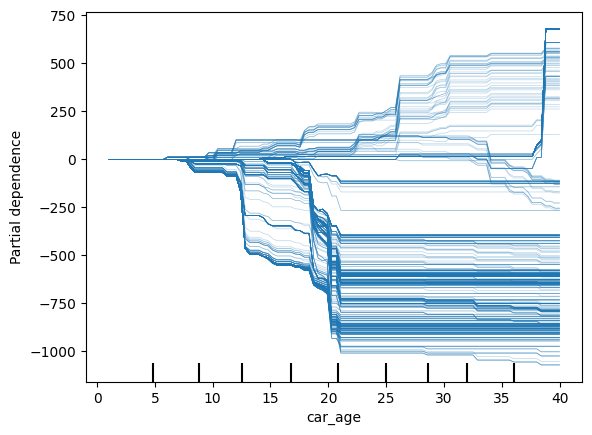

In [10]:
PartialDependenceDisplay.from_estimator(
    model,
    X,
    features,
    kind='individual',  # don't take average, show all lines (ICE plot)
    percentiles=(0,1),
    centered=True,
)
plt.show()

In [ ]:
PartialDependenceDisplay.from_estimator(
    model,
    X,
    features,
    kind='both',  # show PDP line also
    centered=True,
    ice_lines_kw={'color':'black'},
    pd_line_kw={'color':'red', 'lw': 3, 'linestyle':'--'},
)
plt.show()